In [126]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sympy import *
import numpy as np
import math

In [58]:
def alphaM(vs):
    return (2.5 - 0.1 * (vs + 65.0)) / float((np.exp(2.5 - 0.1 * (vs + 65.0)) - 1.0))

def betaM(vs):
    return 4.0 * float(np.exp(-(vs + 65.0) / 18.0))

In [59]:
def alphaH(vs):
    return 0.07 * np.exp(-(vs + 65.0) / float(20.0))

def betaH(vs):
    return 1.0 / float((np.exp(3.0 - 0.1 * (vs + 65.0)) + 1.0))

In [60]:
def alphaN(vs):
    return (0.1 - 0.01 * (vs + 65.0)) / float((np.exp(1.0 - 0.1 * (vs + 65.0)) - 1.0))

def betaN(vs):
    return 0.125 * np.exp(-(vs + 65.0) / float(80.0))

In [118]:
messge1='\ncopie-> 10, 500, -65.002, 0.0529, 0.5961, 0.3176'
messege2='a) teste (input, t, V, m, h, n):'
print(messege2,messge1)

a) teste (input, t, V, m, h, n): 
copie-> 10, 500, -65.002, 0.0529, 0.5961, 0.3176


In [119]:
values = [float(i) for i in input('valores (cole+enter): ').split(',')]

valores (cole+enter): 10, 500, -65.002, 0.0529, 0.5961, 0.3176


In [120]:
for i in range(len(values)):
    if len(values)<6:
        print(messge1,messege2)
    else:
        InputCurrent = values[0]
        tSpan = values[1]
        Ci = values[2]
        mi =values[3]
        hi = values[4]
        ni = values[5]

In [121]:
dt = 0.001 
t = np.arange(0, tSpan, dt)

In [122]:
V = np.zeros(len(t)) 
m = np.zeros(len(t))
n = np.zeros(len(t)) 
h = np.zeros(len(t)) 
gNa = 120.0
eNa = 115.0
gK = 36.0
eK = -12.0
gL = 0.3
eL = 10.6
loop = np.arange(0, tSpan, dt)

In [123]:
for i in range(0, len(loop) - 1):
    m[i + 1] = m[i] + dt * (alphaM(V[i]) * (1 - m[i]) - betaM(V[i]) * m[i])
    h[i + 1] = h[i] + dt * (alphaH(V[i]) * (1 - h[i]) - betaH(V[i]) * h[i])
    n[i + 1] = n[i] + dt * (alphaN(V[i]) * (1 - n[i]) - betaN(V[i]) * n[i])
    V[i + 1] = V[i] + dt * (gNa * m[i] ** 3 * h[i] * (eNa - (V[i] + 65)) + gK * n[i] ** 4 * (eK - (V[i] + 65)) + gL * (eL - (V[i] + 65)) + InputCurrent)

fig = plt.figure()

<Figure size 432x288 with 0 Axes>

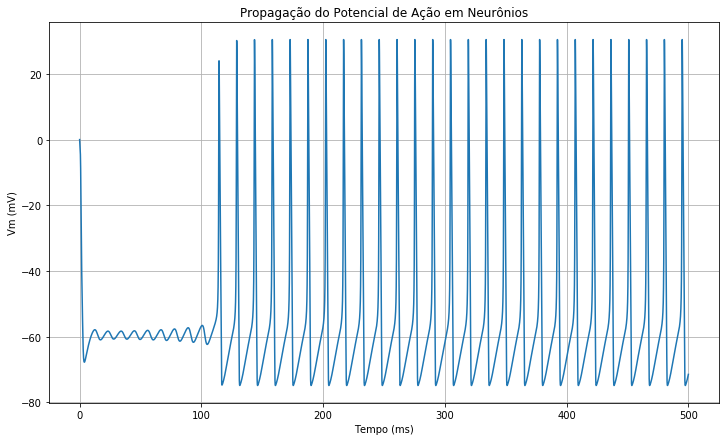

In [130]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(t, V)
ax.set_xlabel('Tempo (ms)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Propagação do Potencial de Ação em Neurônios')
plt.grid()